**Лабораторная 4. Метод k-ближайших соседей**

Задание

Выбор датасета

Я на восьмой позиции в группе, поэтому использую датасет о вине. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

path = "/home/uvusibuneka/Desktop/СИИ/Module 2/lab4/WineDataset.csv"
df = pd.read_csv(path)

target_name = 'Wine'

Предварительная обработка данных

In [2]:
df.fillna(df.mean())


,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,3
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,3
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,3
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,3


Статистика по датасету

In [3]:
df.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


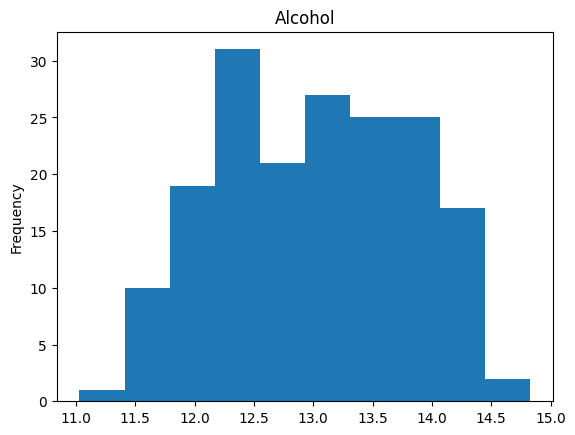

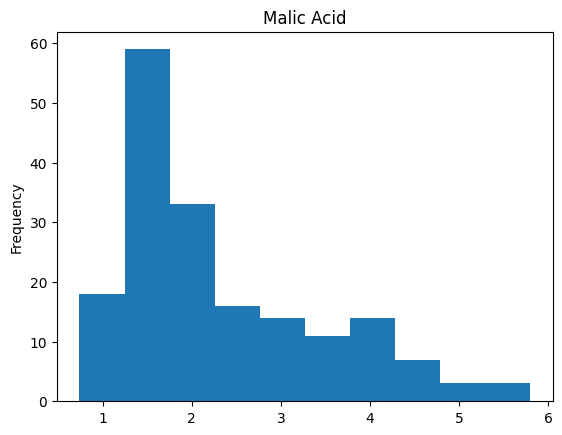

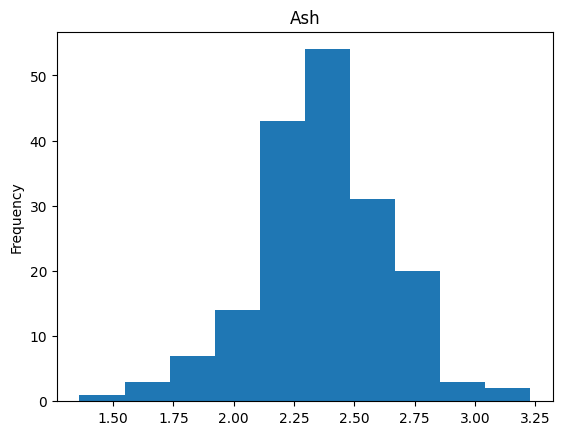

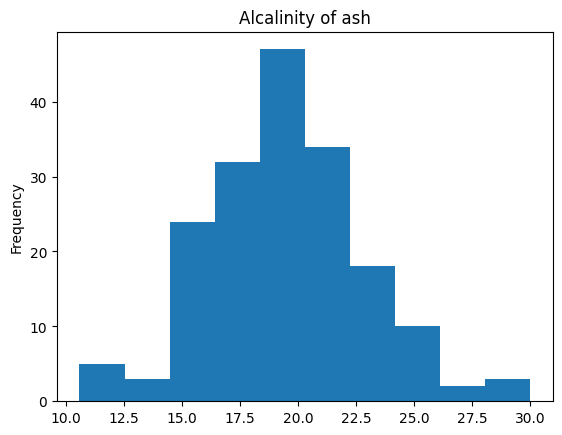

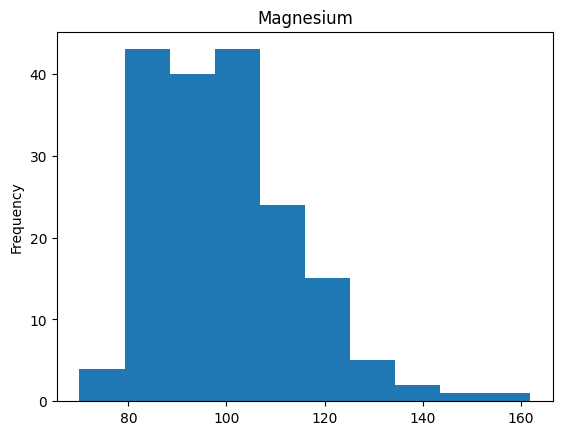

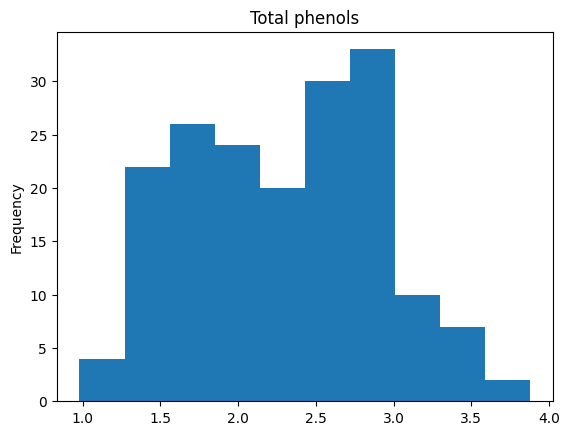

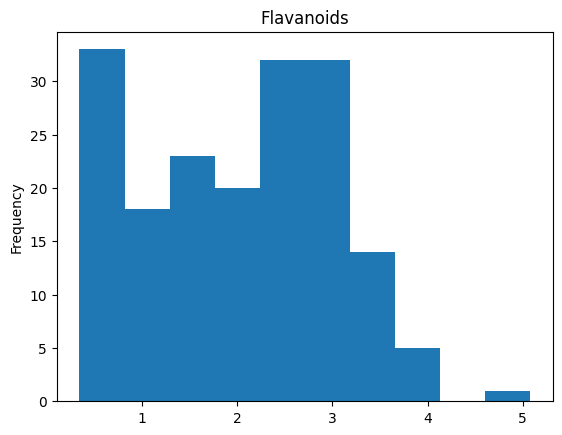

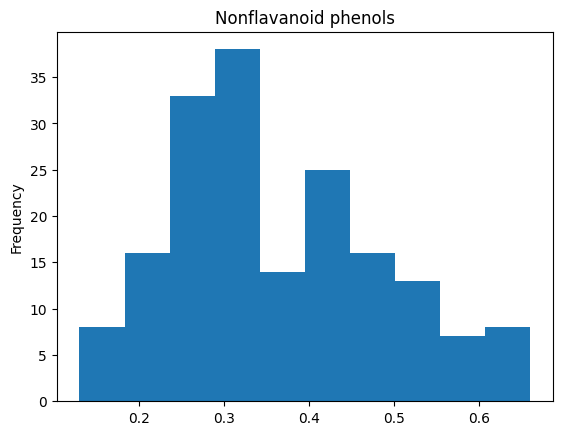

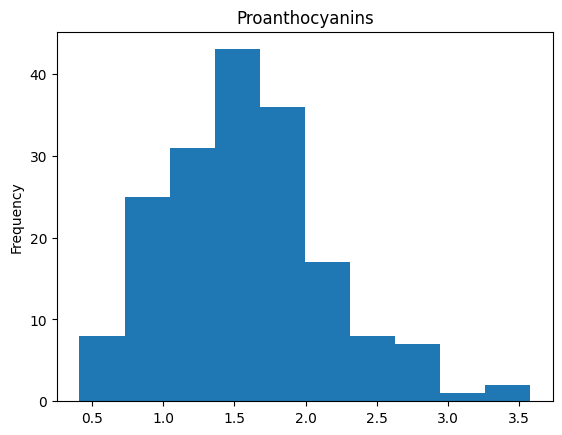

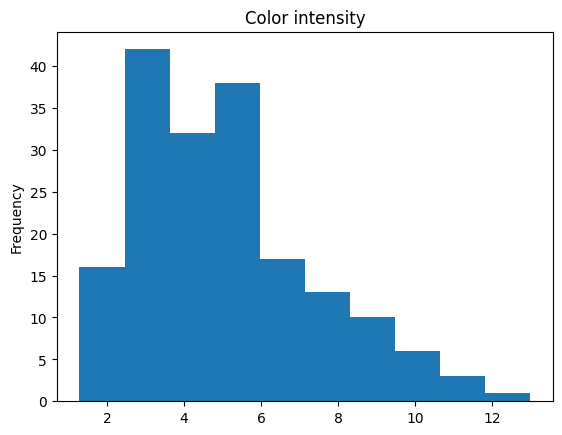

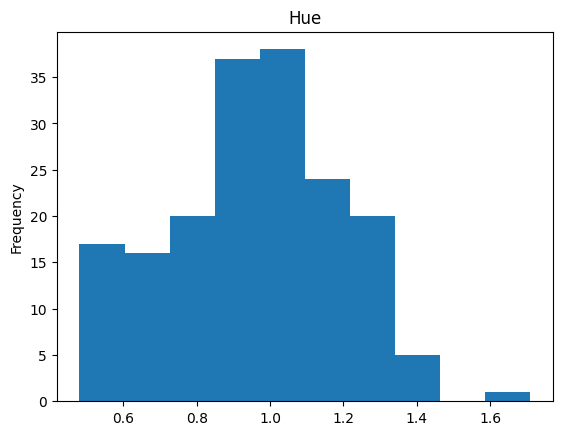

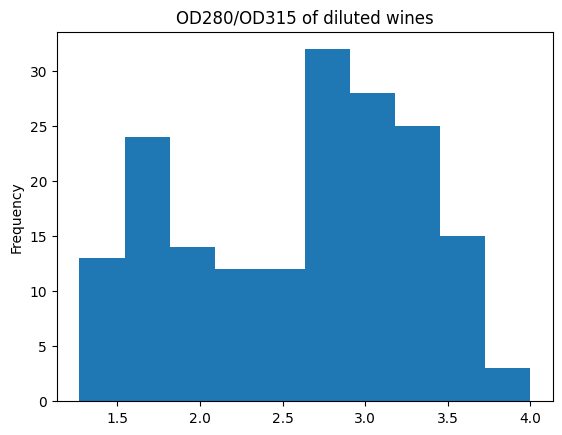

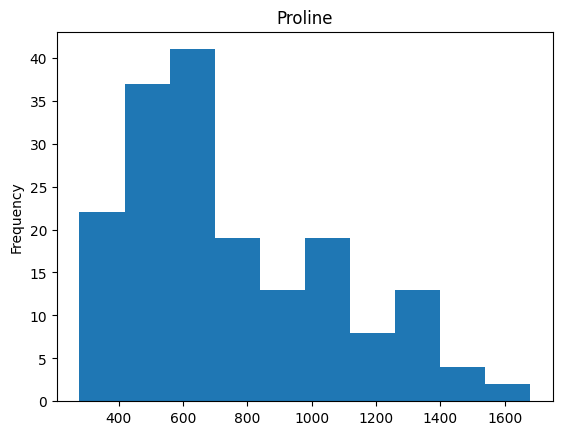

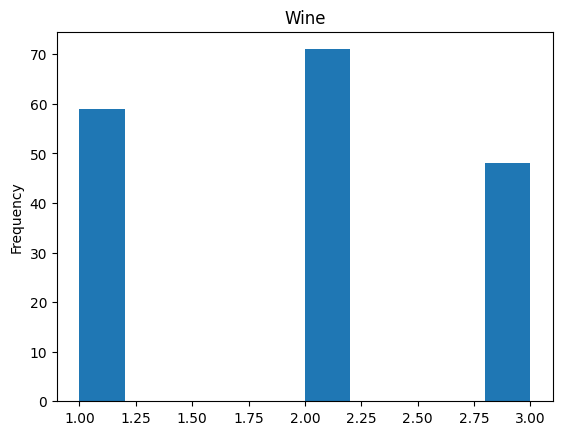

In [4]:
for f in df.columns:
    df[f].plot(kind="hist")
    plt.title(f)
    plt.show()

Функция для нахождения евклидова расстояния

In [5]:
def distance(a: pd.Series, b: pd.Series) -> float:
    return np.sum((a - b)**2)**0.5

Реализация kNN за O(n)

In [6]:
def predict(self, x: pd.Series):
    if len(x) != len(df.columns):
        raise TypeError
    return self.df[self.df.apply(lambda row: self.distance(row, x), axis=1).nsmallest(self.k).index][self.df.columns[-1]].value_counts().idxmax()
  
    

Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas. 

Напишем класс модели kNN и реализуем их с разными наборами признаков по заданию

In [7]:


class kNN_model:
    def __init__(self, k: int, df: pd.DataFrame):
        self.k = k
        self.df = df
    
    def fit(self):
        pass
    
    def predict(self, x: pd.Series) -> int:
        nearest_neighbors = self.df.apply(lambda row: distance(row, x), axis=1).nsmallest(self.k)
        return self.df.loc[nearest_neighbors.index, 'Wine'].mode()[0]

    def error_matrix(self, X_test: pd.DataFrame, y_test: pd.Series) -> pd.DataFrame:
        unique_classes = y_test.unique()

        m_err = pd.DataFrame(0, index=[f"Actual result is {int(y)}" for y in unique_classes],
                             columns=[f"Predicted result is {int(y)}" for y in unique_classes])
    
        for x, y in zip(X_test.iterrows(), y_test):
            actual_label = f"Actual result is {int(y)}"
            predicted_label = f"Predicted result is {int(self.predict(x[1]))}"
            m_err.at[actual_label, predicted_label] += 1

        return m_err



Постройте две модели k-NN с различными наборами признаков:

Модель 1 Признаки случайно отбираются .

In [8]:
class random_knn_model(kNN_model):
    def predict(self, x: pd.Series)-> int:
        random_features = np.random.choice([c for c in self.df.columns if c != target_name], replace=False)
        nearest_neighbors = self.df.apply(lambda row: distance(row[random_features], x[random_features]), axis=1).nsmallest(self.k)
        return self.df.loc[nearest_neighbors.index, 'Wine'].mode()[0]
    
    

Модель 2 Фиксированный набор признаков

In [9]:
class instant_knn_model(kNN_model):
    pass

Нормализуем выборку

In [10]:
target = df[target_name]
df = df.drop(columns=[target_name])
df = (df - df.min())/(df.max() - df.min())
df[target_name] = target

Разобьем выборку

In [11]:
df_train = df.sample(frac=0.5)
X_train, y_train = df_train.drop(target_name, axis=1), df_train[target_name]
X_test, y_test = df.drop(df_train.index).drop(target_name, axis=1), df.drop(df_train.index)[target_name]

Выводим матрицу ошибок для разных моделей

In [12]:
k = [3, 5, 7, 9, 11]

instant = [instant_knn_model(i, df) for i in k]
r_model = [random_knn_model(i, df) for i in k]

for i in range(len(k)):
    instant[i].error_matrix(X_test, y_test).to_csv(f"Instant model with k = {k[i]}.csv")
    r_model[i].error_matrix(X_test, y_test).to_csv(f"Random model with k = {k[i]}.csv")

    

In [13]:
y_test

5      1
6      1
11     1
14     1
16     1
      ..
171    3
173    3
174    3
175    3
177    3
Name: Wine, Length: 89, dtype: int64